In [690]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from numpy import sort
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
from wordcloud import WordCloud, STOPWORDS 
from random import sample
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.utils import resample
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [691]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#### Import Dataset

In [692]:
df_rating = pd.read_csv('/Users/jung0202/Downloads/corporate_rating.csv')
df_rating.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


In [674]:
# Display the dimensions
print("The credit rating dataset has", df_rating.shape[0], "records, each with", df_rating.shape[1], "attributes")

The credit rating dataset has 2029 records, each with 31 attributes


In [675]:
# Display the structure
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Rating                              2029 non-null   object 
 1   Name                                2029 non-null   object 
 2   Symbol                              2029 non-null   object 
 3   Rating Agency Name                  2029 non-null   object 
 4   Date                                2029 non-null   object 
 5   Sector                              2029 non-null   object 
 6   currentRatio                        2029 non-null   float64
 7   quickRatio                          2029 non-null   float64
 8   cashRatio                           2029 non-null   float64
 9   daysOfSalesOutstanding              2029 non-null   float64
 10  netProfitMargin                     2029 non-null   float64
 11  pretaxProfitMargin                  2029 no

<AxesSubplot:>

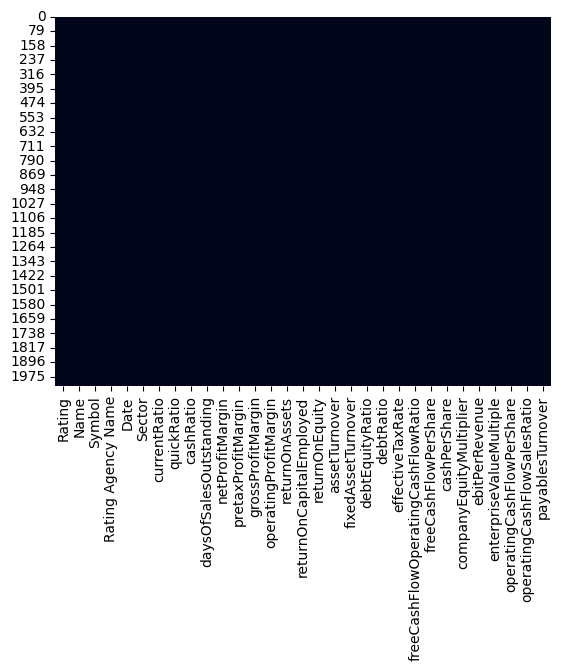

In [676]:
sns.heatmap(df_rating.isnull(), cbar=False)

BBB    671
BB     490
A      398
B      302
AA      89
CCC     64
AAA      7
CC       5
C        2
D        1
Name: Rating, dtype: int64


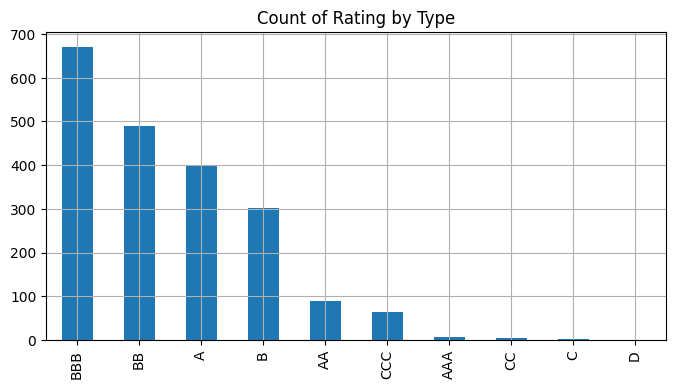

In [677]:
ax = df_rating.Rating.value_counts().plot(kind='bar', figsize=(8,4), title="Count of Rating by Type", grid=True)
print(df_rating.Rating.value_counts())

Standard & Poor's Ratings Services    744
Egan-Jones Ratings Company            603
Moody's Investors Service             579
Fitch Ratings                         100
DBRS                                    3
Name: Rating Agency Name, dtype: int64


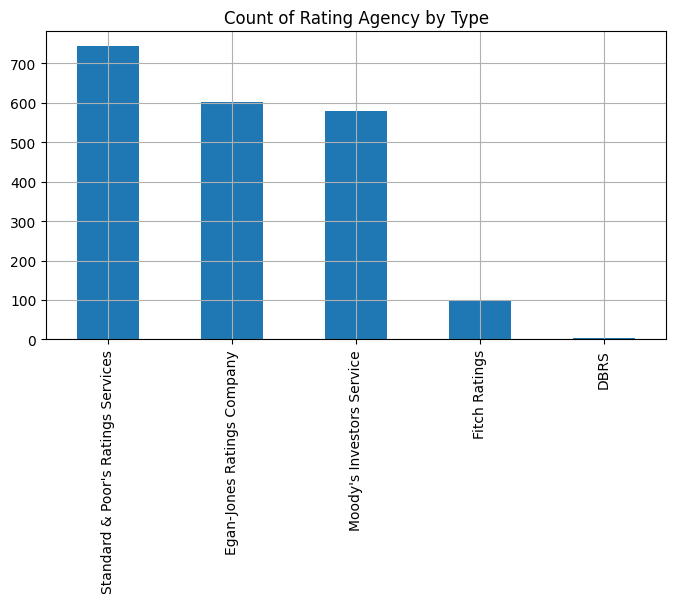

In [678]:
ax = df_rating['Rating Agency Name'].value_counts().plot(kind='bar', figsize=(8,4), title="Count of Rating Agency by Type", grid=True)
print(df_rating['Rating Agency Name'].value_counts())

Energy                   294
Basic Industries         260
Consumer Services        250
Technology               234
Capital Goods            233
Public Utilities         211
Health Care              171
Consumer Non-Durables    132
Consumer Durables         74
Transportation            63
Miscellaneous             57
Finance                   50
Name: Sector, dtype: int64


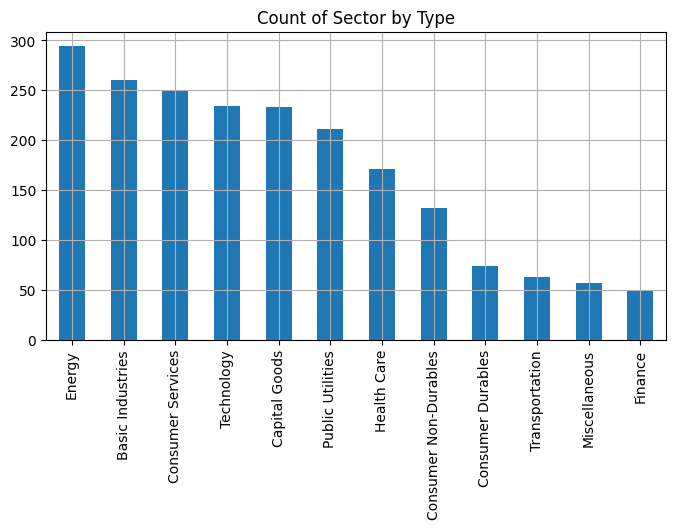

In [679]:
ax = df_rating['Sector'].value_counts().plot(kind='bar', figsize=(8,4), title="Count of Sector by Type", grid=True)
print(df_rating['Sector'].value_counts())

In [693]:
df_rating = df_rating.drop(['Name', 'Symbol', 'Date'], axis=1)
df_rating.head()

,Rating,Rating Agency Name,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Egan-Jones Ratings Company,Consumer Durables,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Egan-Jones Ratings Company,Consumer Durables,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Fitch Ratings,Consumer Durables,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Fitch Ratings,Consumer Durables,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Standard & Poor's Ratings Services,Consumer Durables,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


We observe that the dataset is very unbalanced. We have 671 triple-Bs (BBB) but only 1 D. However, we are working with Ratings from different companies such as `Moody's`, `Standard & Poor's` and more. Therefore it is preferred to simplify the labels according to this table from the website [investopedia](https://www.investopedia.com/terms/c/corporate-credit-rating.asp). We will classify our labels according to the grading risk and not the rate. 

| Bond Rating |                   |          |            |              |
|-------------|-------------------|----------|------------|--------------|
| Moody's     | Standard & Poor's | Fitch    | Grade      | Risk         |
| Aaa         | AAA               | AAA      | Investment | Lowest Risk  |
| Aa          | AA                | AA       | Investment | Low Risk     |
| A           | A                 | A        | Investment | Low Risk     |
| Baa         | BBB               | BBB      | Investment | Medium Risk  |
| Ba, B       | BB, B             | BB, B    | Junk       | High Risk    |
| Caa/Ca      | CCC/CC/C          | CCC/CC/C | Junk       | Highest Risk |
| C           | D                 | D        | Junk       | In Default   |


To do it we will replace with a dictonary each of this ratings. 

In [694]:
rating_dict = {'AAA':'Lowest', 
               'AA':'Low',
               'A':'Low',
               'BBB':'Medium', 
               'BB':'High',
               'B':'High',
               'CCC':'Highest', 
               'CC':'Highest',
               'C':'Highest',
               'D':'Default'}

df_rating.Rating = df_rating.Rating.map(rating_dict)

High       792
Medium     671
Low        487
Highest     71
Lowest       7
Default      1
Name: Rating, dtype: int64


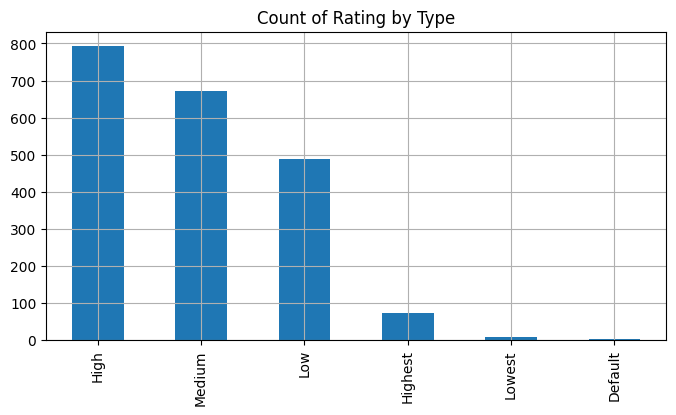

In [695]:
ax = df_rating['Rating'].value_counts().plot(kind='bar', figsize=(8,4), title="Count of Rating by Type", grid=True)
print(df_rating['Rating'].value_counts())

<AxesSubplot:>

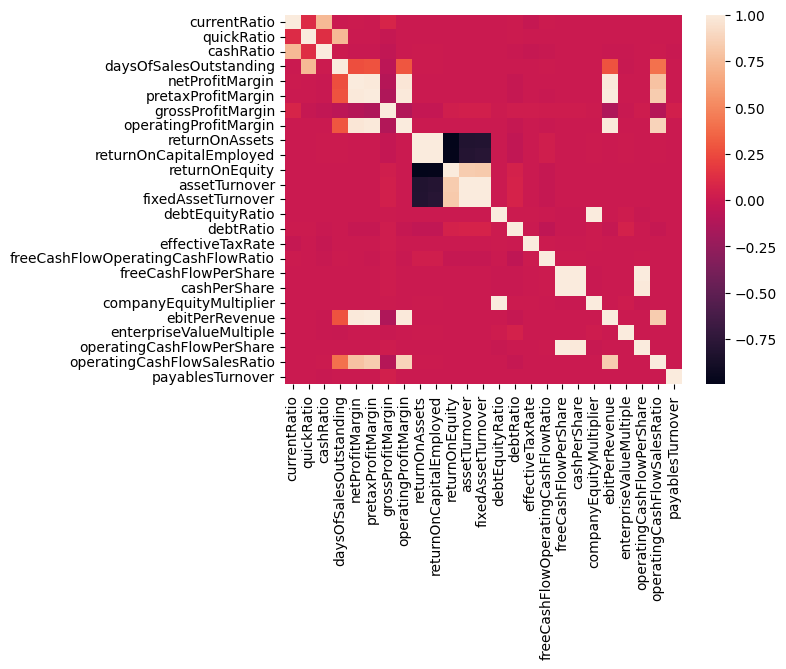

In [683]:
sns.heatmap(df_rating.corr())

In [684]:
# Statistical summary 
df_rating.describe()

,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,returnOnCapitalEmployed,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
count,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,2029.000000,...,2029.000000,2029.000000,2.029000e+03,2.029000e+03,2029.000000,2029.000000,2029.000000,2.029000e+03,2029.000000,2029.000000
mean,3.529607,2.653986,0.667364,333.795606,0.278447,0.431483,0.497968,0.587322,-37.517928,-73.974193,...,0.397572,0.409550,5.094719e+03,4.227549e+03,3.323579,0.437454,48.287985,6.515123e+03,1.447653,38.002718
std,44.052361,32.944817,3.583943,4447.839583,6.064134,8.984982,0.525307,11.224622,1166.172220,2350.275719,...,10.595075,3.796488,1.469156e+05,1.224000e+05,87.529866,8.984299,529.118961,1.775290e+05,19.483294,758.923588
min,-0.932005,-1.893266,-0.192736,-811.845623,-101.845815,-124.343612,-14.800817,-124.343612,-40213.178290,-87162.162160,...,-100.611015,-120.916010,-4.912742e+03,-1.915035e+01,-2555.419643,-124.343612,-3749.921337,-1.195049e+04,-4.461837,-76.662850
25%,1.071930,0.602825,0.130630,22.905093,0.021006,0.025649,0.233127,0.044610,0.019176,0.028112,...,0.146854,0.271478,4.119924e-01,1.566038e+00,2.046822,0.028057,6.238066,2.356735e+00,0.073886,2.205912
50%,1.493338,0.985679,0.297493,42.374120,0.064753,0.084965,0.414774,0.107895,0.045608,0.074421,...,0.300539,0.644529,2.131742e+00,3.686513e+00,2.652456,0.087322,9.274398,4.352584e+00,0.133050,5.759722
75%,2.166891,1.453820,0.624906,59.323563,0.114807,0.144763,0.849693,0.176181,0.077468,0.135036,...,0.370653,0.836949,4.230253e+00,8.086152e+00,3.658331,0.149355,12.911759,7.319759e+00,0.240894,9.480892
max,1725.505005,1139.541703,125.917417,115961.637400,198.517873,309.694856,2.702533,410.182214,0.487826,2.439504,...,429.926282,34.594086,5.753380e+06,4.786803e+06,2562.871795,309.694856,11153.607090,6.439270e+06,688.526591,20314.880400


### Skewness and Outliers

In [685]:
column_list = df_rating.columns[3:]

IndexError: index 25 is out of bounds for axis 0 with size 25

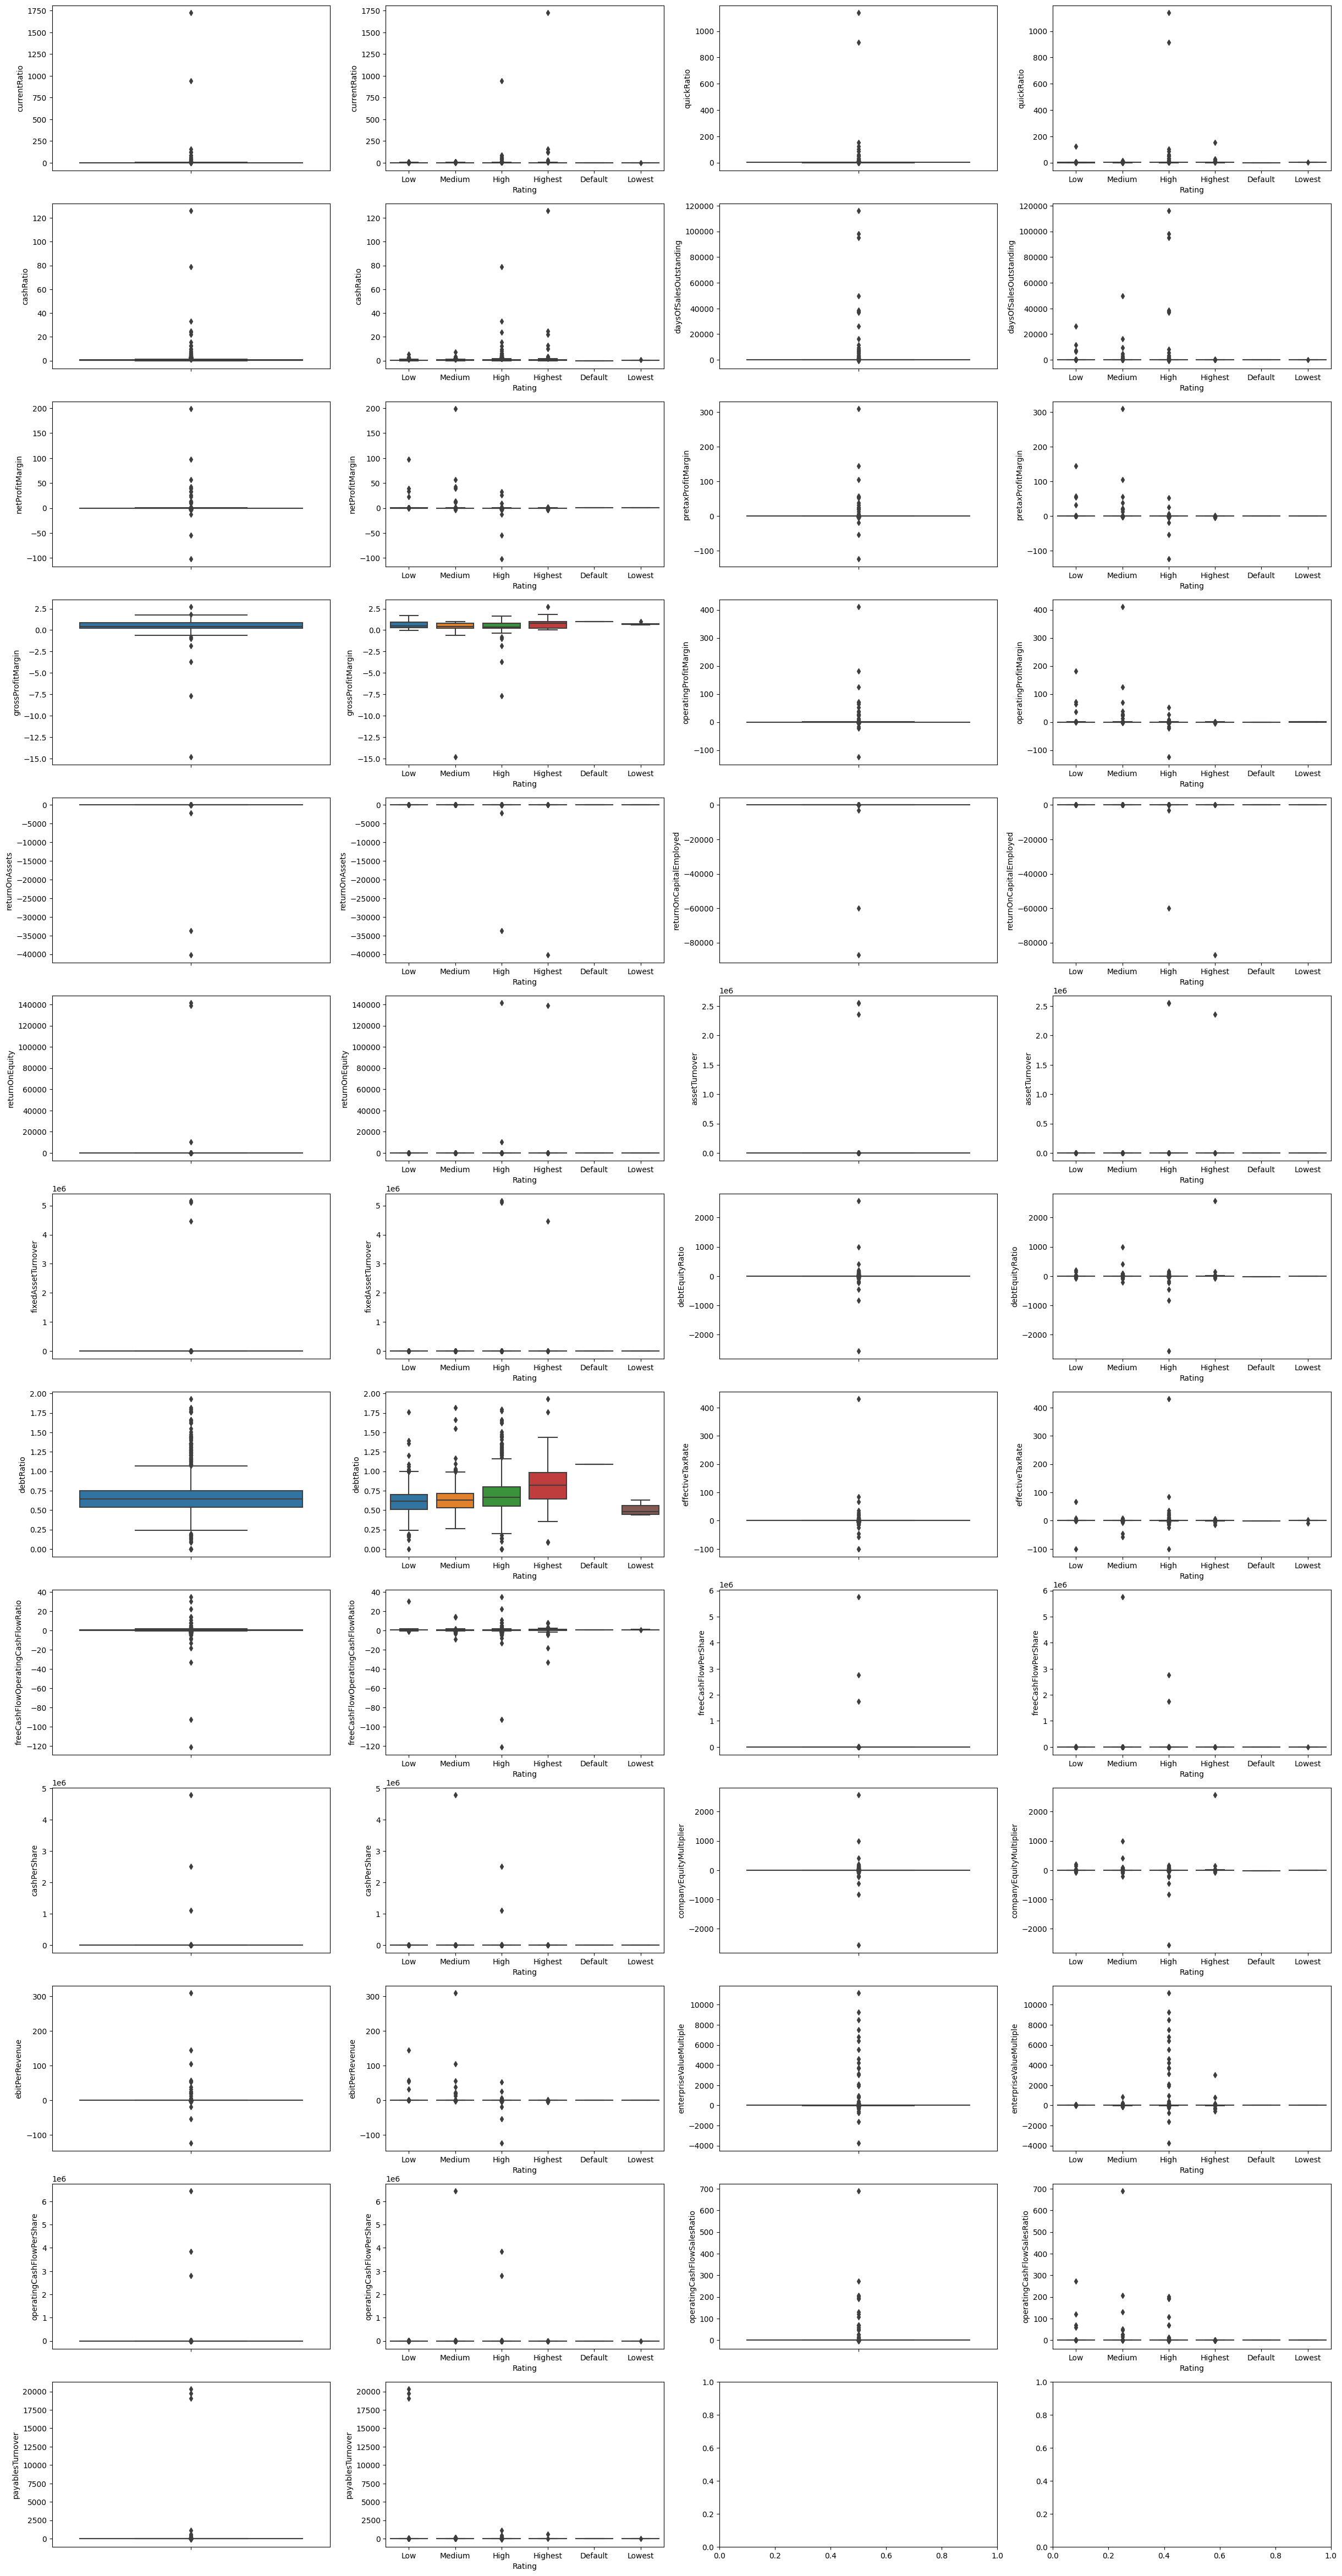

In [686]:
figure, axes = plt.subplots(nrows=13, ncols=4, figsize=(30,60))

for i in range(13):
    for j in range(2):
        sns.boxplot(y=df_rating[column_list[2*i + j]], ax=axes[i, 2*j])
        sns.boxplot(x=df_rating.Rating, y=df_rating[column_list[2*i + j]], ax=axes[i, 2*j+1])
        
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.001, top=0.9, wspace=0.4, hspace=0.4)

In [696]:
df_rating_scaled = df_rating.copy()

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

for c in df_rating_scaled.columns[3:]:
    df_rating_scaled[c] = min_max_scaler.fit_transform(df_rating_scaled[[c]].to_numpy())*100
    df_rating_scaled[c] = df_rating_scaled[c].apply(lambda x: np.log10(x+0.01))

IndexError: index 25 is out of bounds for axis 0 with size 25

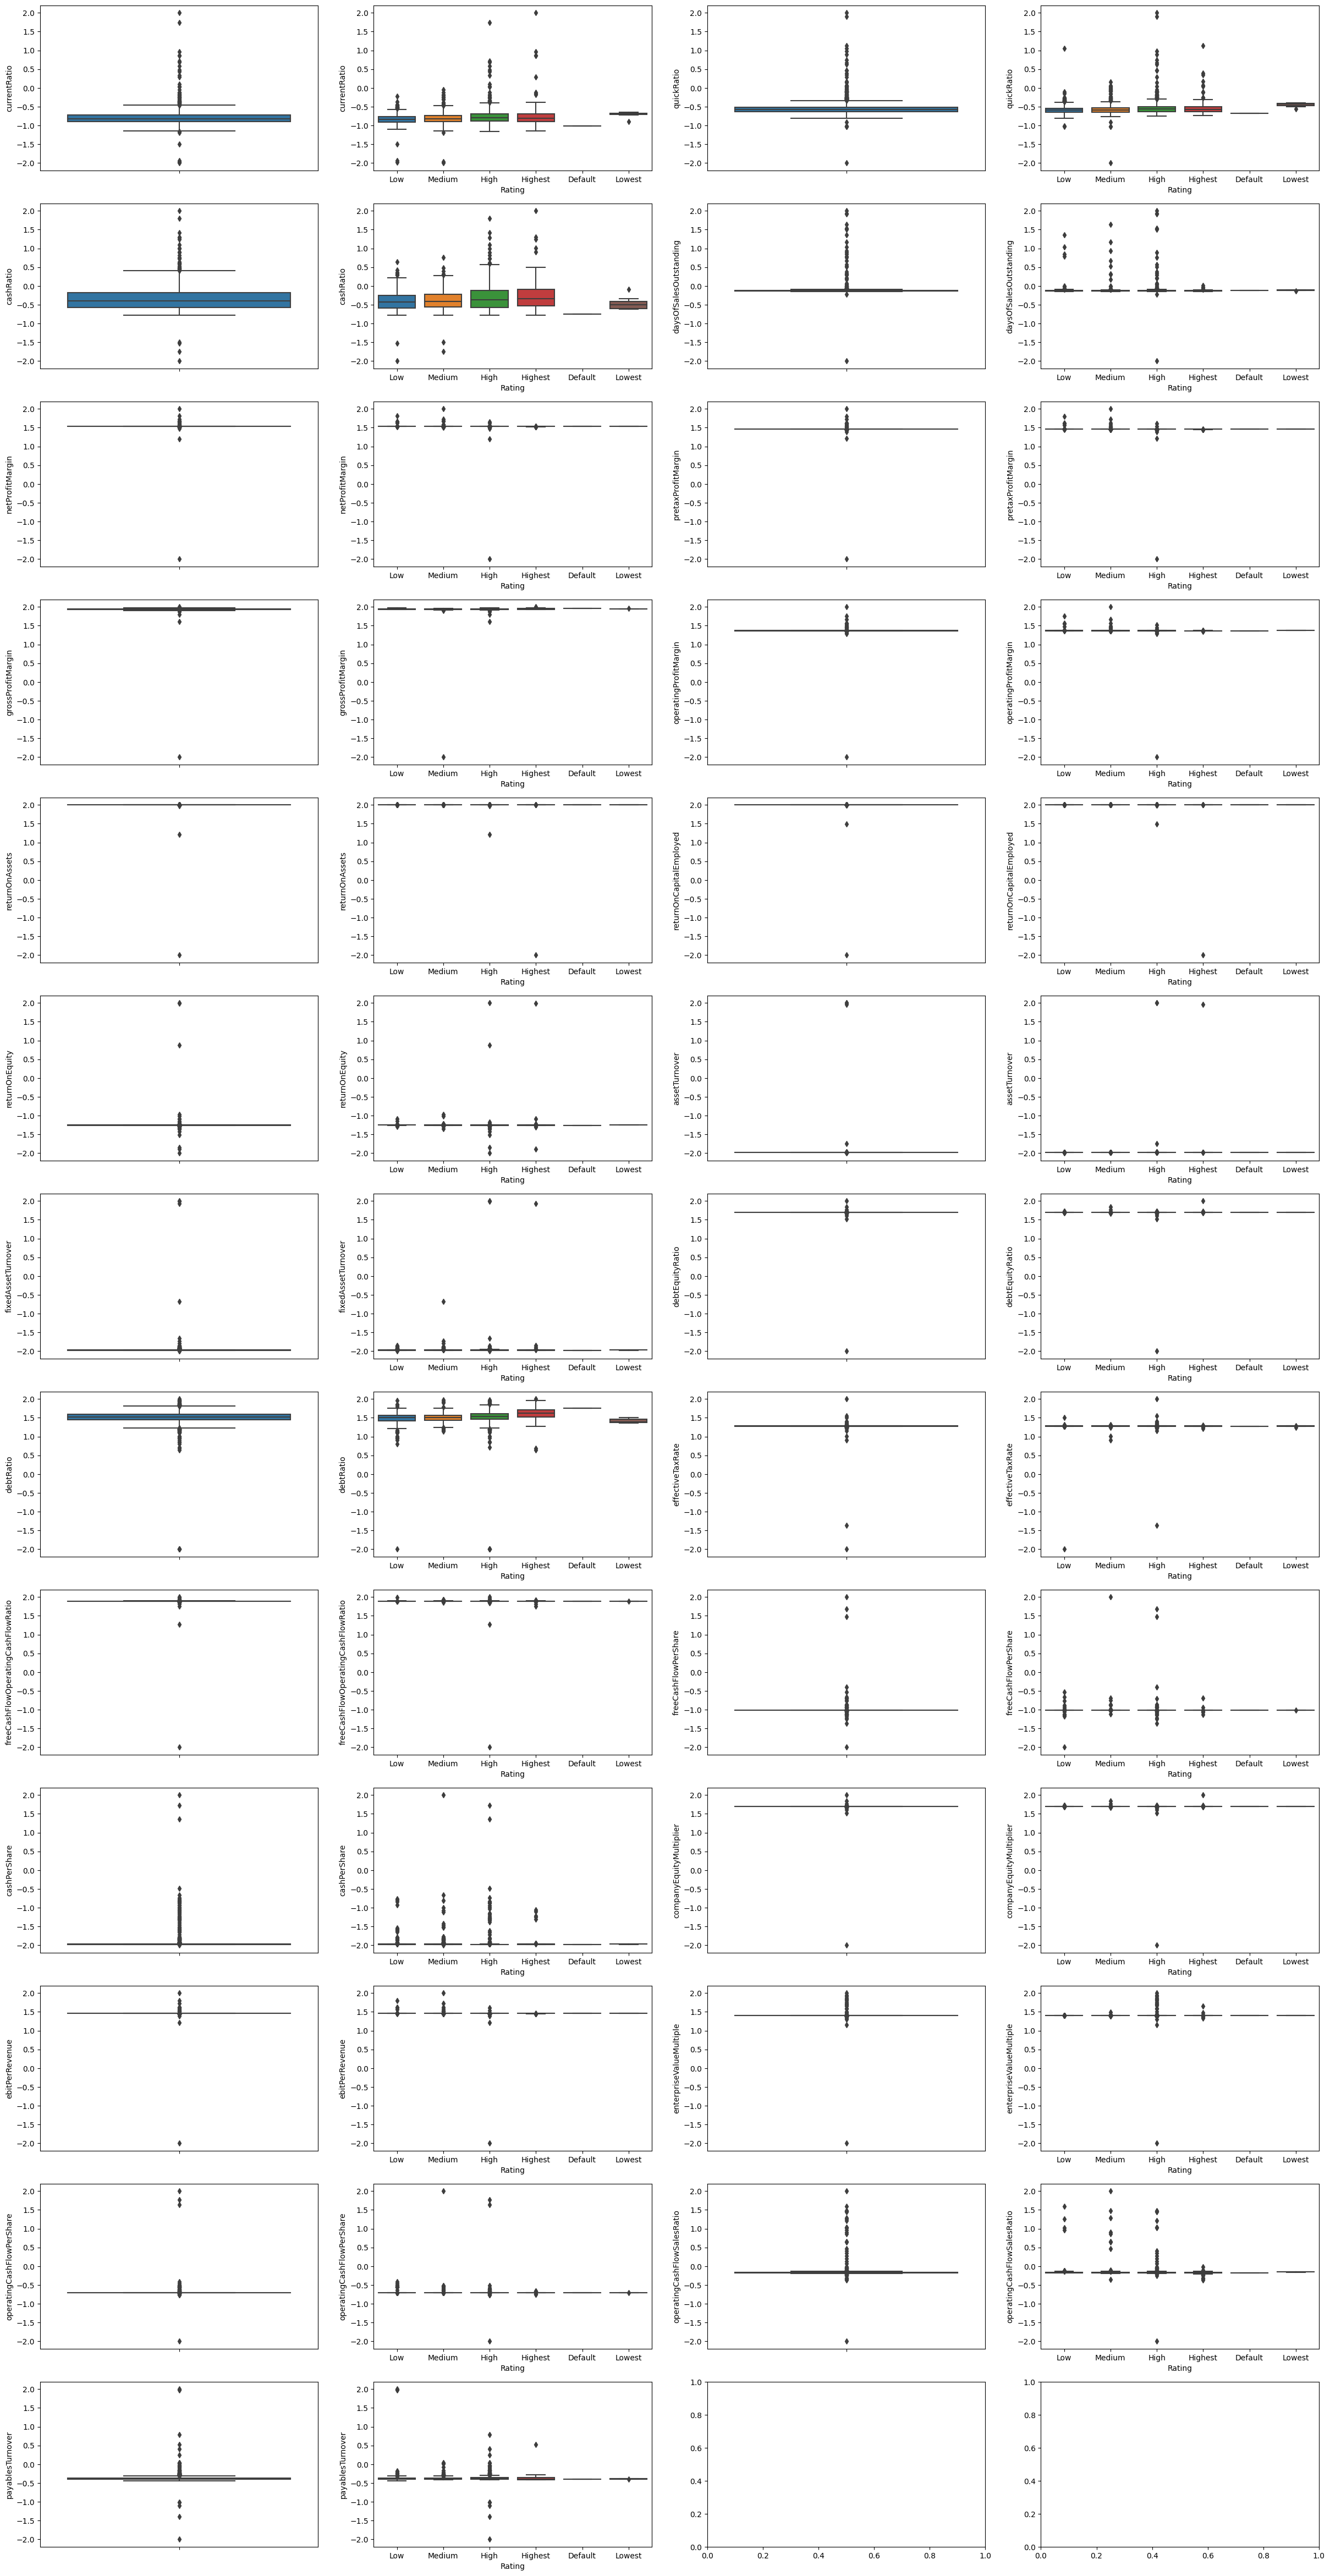

In [ ]:
figure, axes = plt.subplots(nrows=13, ncols=4, figsize=(30,60))

for i in range(13):
    for j in range(2):
        sns.boxplot(y=df_rating_scaled[column_list[2*i + j]], ax=axes[i, 2*j])
        sns.boxplot(x=df_rating_scaled.Rating, y=df_rating_scaled[column_list[2*i + j]], ax=axes[i, 2*j+1])
        
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.001, top=0.9, wspace=0.4, hspace=0.4)

In [ ]:
for c in df_rating.columns[3:]:
    
    q1 = df_rating[c].quantile(0.25)
    q3 = df_rating[c].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q3-1.5*iqr
    fence_high = q1+1.5*iqr
    lower_out = len(df_rating.loc[(df_rating[c] < fence_low)  ,c])
    upper_out = len(df_rating.loc[(df_rating[c] > fence_high)  ,c])
    outlier_count = upper_out+lower_out
    prop_out = outlier_count/len(df_rating)
    print(c, ": "+"{:.2%}".format(prop_out))

currentRatio : 17.79%
quickRatio : 19.12%
cashRatio : 14.79%
daysOfSalesOutstanding : 23.66%
netProfitMargin : 25.09%
pretaxProfitMargin : 24.49%
grossProfitMargin : 0.99%
operatingProfitMargin : 22.13%
returnOnAssets : 24.25%
returnOnCapitalEmployed : 21.98%
returnOnEquity : 28.59%
assetTurnover : 16.02%
fixedAssetTurnover : 13.41%
debtEquityRatio : 22.13%
debtRatio : 21.19%
effectiveTaxRate : 28.09%
freeCashFlowOperatingCashFlowRatio : 17.05%
freeCashFlowPerShare : 23.51%
cashPerShare : 17.05%
companyEquityMultiplier : 21.98%
ebitPerRevenue : 24.35%
enterpriseValueMultiple : 23.71%
operatingCashFlowPerShare : 17.69%
operatingCashFlowSalesRatio : 17.00%
payablesTurnover : 14.44%


In [ ]:
df_rating_outlier = df_rating.copy()

for c in df_rating_outlier.columns[3:]:
    
    q1 = df_rating_outlier[c].quantile(0.25)
    q3 = df_rating_outlier[c].quantile(0.75)
    iqr = q3 - q1 #Interquartile range
    fence_low  = q3-1.5*iqr
    fence_high = q1+1.5*iqr
    
    for i in range(len(df_rating_outlier)):
        
        if df_rating.loc[i,c] < fence_low or df_rating.loc[i,c] > fence_high: # if Outlier
            df_rating_outlier.loc[i,c] = 1
        
        else: # Not Outlier
            df_rating_outlier.loc[i,c] = 0
            

df_rating_outlier["total"] = df_rating_outlier.sum(axis=1)

<AxesSubplot:>

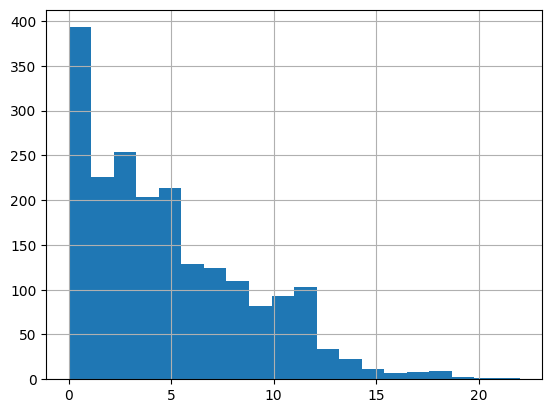

In [ ]:
df_rating_outlier.total.hist(bins = 20)

<AxesSubplot:xlabel='Rating', ylabel='total'>

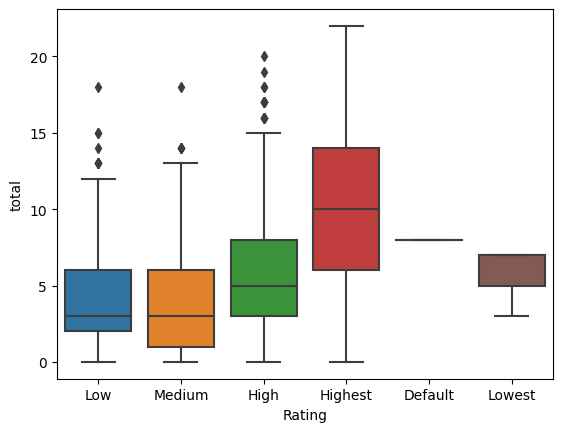

In [ ]:
sns.boxplot(x=df_rating_outlier.Rating, y=df_rating_outlier.total)

In [ ]:
df_rating.skew(axis=0)

currentRatio                          34.338889
quickRatio                            30.925641
cashRatio                             27.098772
daysOfSalesOutstanding                20.399567
netProfitMargin                       17.619910
pretaxProfitMargin                    22.096334
grossProfitMargin                    -14.203446
operatingProfitMargin                 26.493892
returnOnAssets                       -32.112571
returnOnCapitalEmployed              -33.318531
returnOnEquity                        31.702500
assetTurnover                         26.020347
fixedAssetTurnover                    26.120457
debtEquityRatio                        0.268993
debtRatio                              1.285251
effectiveTaxRate                      32.308742
freeCashFlowOperatingCashFlowRatio   -22.913129
freeCashFlowPerShare                  33.677207
cashPerShare                          34.025861
companyEquityMultiplier                0.269093
ebitPerRevenue                        22

# Machine Learning 

Is it possible to predict what creidt profile a company will receive from a rating agency based on its financial indicators? If so, what are the most important predictors? Apparently not much work has been done with regards to this question. This academic [paper](https://www.researchgate.net/publication/331386740_Credit_Rating_Forecasting_Using_Machine_Learning_Techniques) was the only work found about it. It is worth checking it out. As we will do it, it tests most ML algorithms and identifies the most important features. 

In the following steps we will perform the following:

1. Prepare the dataset 
    - Split in train and test
    - Transform/Encode the features kand labels
2. Test a wide range of ML models (Tree-based, Probabilistic and so on). 
3. Compare the accuracry of all models. 
4. Choose our winning model and tune hyperparameters to target a higher accuracy.
5. Make a more profound evaluation of the result with a confusion matrix and different measures. 
6. identify the most important features to predict the rating. 



## Prepare the Dataset

In [697]:
rating_dict = {'Lowest' : 5,
               'Low' : 4,
               'Medium' : 3, 
               'High' : 2,
               'Highest' : 1,
               'Default' : 0}
df_rating.Rating = df_rating.Rating.map(rating_dict) # encode rating
df_rating.astype({'Rating' : 'int'})

#df_rating = df_rating.drop(['Sector', 'Rating Agency Name'], axis=1)
df_rating = pd.get_dummies(df_rating) # Dummy variables

In [731]:
#df_rating['total'] = df_rating_outlier.total

In [732]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 43 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Rating                                                 2029 non-null   int64  
 1   currentRatio                                           2029 non-null   float64
 2   quickRatio                                             2029 non-null   float64
 3   cashRatio                                              2029 non-null   float64
 4   daysOfSalesOutstanding                                 2029 non-null   float64
 5   netProfitMargin                                        2029 non-null   float64
 6   pretaxProfitMargin                                     2029 non-null   float64
 7   grossProfitMargin                                      2029 non-null   float64
 8   operatingProfitMargin                           

In [733]:
df_train, df_test = train_test_split(df_rating, test_size=0.2, random_state = 1234)

X_train, y_train = df_train.iloc[:,1:], df_train.iloc[:,0]
X_test, y_test = df_test.iloc[:,1:], df_test.iloc[:,0]

# Fit Models

Now we will test a range of models. In each we will fit the model in the train data, make predictons for the test data and  obtain the accuracy. In later steps we will compare the accuracy of all the models. We will use primarily the library `sklearn` but also `XGBoost`.  

#### XGBoost

In [734]:
XGB_model = xgb.XGBRegressor(objective ='multi:softmax', num_class = 6)
XGB_model.fit(X_train, y_train)
y_pred_XGB = XGB_model.predict(X_test)
Accuracy_XGB = metrics.accuracy_score(y_test, y_pred_XGB)
print("XGB Accuracy:", Accuracy_XGB)

XGB Accuracy: 0.6798029556650246


#### Gradient Boosting Classifier

In [735]:
GBT_model = GradientBoostingClassifier(random_state=123)
GBT_model.fit(X_train, y_train)
y_pred_GBT = GBT_model.predict(X_test)
Accuracy_GBT = metrics.accuracy_score(y_test, y_pred_GBT)
print("GBT Accuracy:",Accuracy_GBT)

GBT Accuracy: 0.6354679802955665


#### Random Forest

In [736]:
RF_model = RandomForestClassifier(random_state=1234)
RF_model.fit(X_train,y_train)
y_pred_RF = RF_model.predict(X_test)
Accuracy_RF = metrics.accuracy_score(y_test, y_pred_RF)
print("RF Accuracy:",Accuracy_RF)

RF Accuracy: 0.6699507389162561


#### Support Vector Machine


In [737]:
SVC_model = svm.SVC(kernel='rbf', gamma= 2, C = 5, random_state=1234)
SVC_model.fit(X_train, y_train)
y_pred_SVM = SVC_model.predict(X_test)
Accuracy_SVM = metrics.accuracy_score(y_test, y_pred_SVM)
print("SVM Accuracy:",Accuracy_SVM)

SVM Accuracy: 0.41133004926108374


#### Neural Network

In [738]:
MLP_model = MLPClassifier(hidden_layer_sizes=(5,5,5), activation='logistic', solver='adam', max_iter=1500)
MLP_model.fit(X_train, y_train)
y_pred_MLP = MLP_model.predict(X_test)
Accuracy_MLP = metrics.accuracy_score(y_test, y_pred_MLP)
print("MLP Accuracy:",Accuracy_MLP)

MLP Accuracy: 0.5541871921182266


#### Naive Bayes

In [739]:
GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)
y_pred_GNB = GNB_model.predict(X_test)
Accuracy_GNB = metrics.accuracy_score(y_test, y_pred_GNB)
print("GNB Accuracy:",Accuracy_GNB)

GNB Accuracy: 0.07881773399014778


#### Linear Discriminant Analysis

In [740]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(X_train,y_train)
y_pred_LDA = LDA_model.predict(X_test)
Accuracy_LDA = metrics.accuracy_score(y_test, y_pred_LDA)
print("LDA Accuracy:",Accuracy_LDA)

LDA Accuracy: 0.5024630541871922


#### K Nearest Neighbours


In [741]:
KNN_model = KNeighborsClassifier(n_neighbors = 3)
KNN_model.fit(X_train,y_train)
y_pred_KNN = KNN_model.predict(X_test)
Accuracy_KNN = metrics.accuracy_score(y_test, y_pred_KNN)
print("KNN Accuracy:",Accuracy_KNN)

KNN Accuracy: 0.5394088669950738


#### Logistic Regression


In [742]:
LR_model = LogisticRegression(random_state=1234 , multi_class='multinomial', solver='newton-cg')
LR_model = LR_model.fit(X_train, y_train)
y_pred_LR = LR_model.predict(X_test)
Accuracy_LR = metrics.accuracy_score(y_test, y_pred_LR)
print("LR Accuracy:",Accuracy_LR)

LR Accuracy: 0.5246305418719212


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  ConvergenceWarning,


## Compare Results

In [743]:
accuracy_list = [Accuracy_XGB, Accuracy_GBT, Accuracy_RF, Accuracy_SVM, Accuracy_MLP, Accuracy_GNB, 
                 Accuracy_LDA, Accuracy_KNN, Accuracy_LR]

model_list = ['XGBboost', 'Gradient Boosting', 'Random Forest', 'Support Vector Machine', 
              "Neural Network", 'Naive Bayes', 'Linear Discriminat', 'KNN', 'Logistic Regression']

df_accuracy = pd.DataFrame({'Model': model_list, 'Accuracy': accuracy_list})

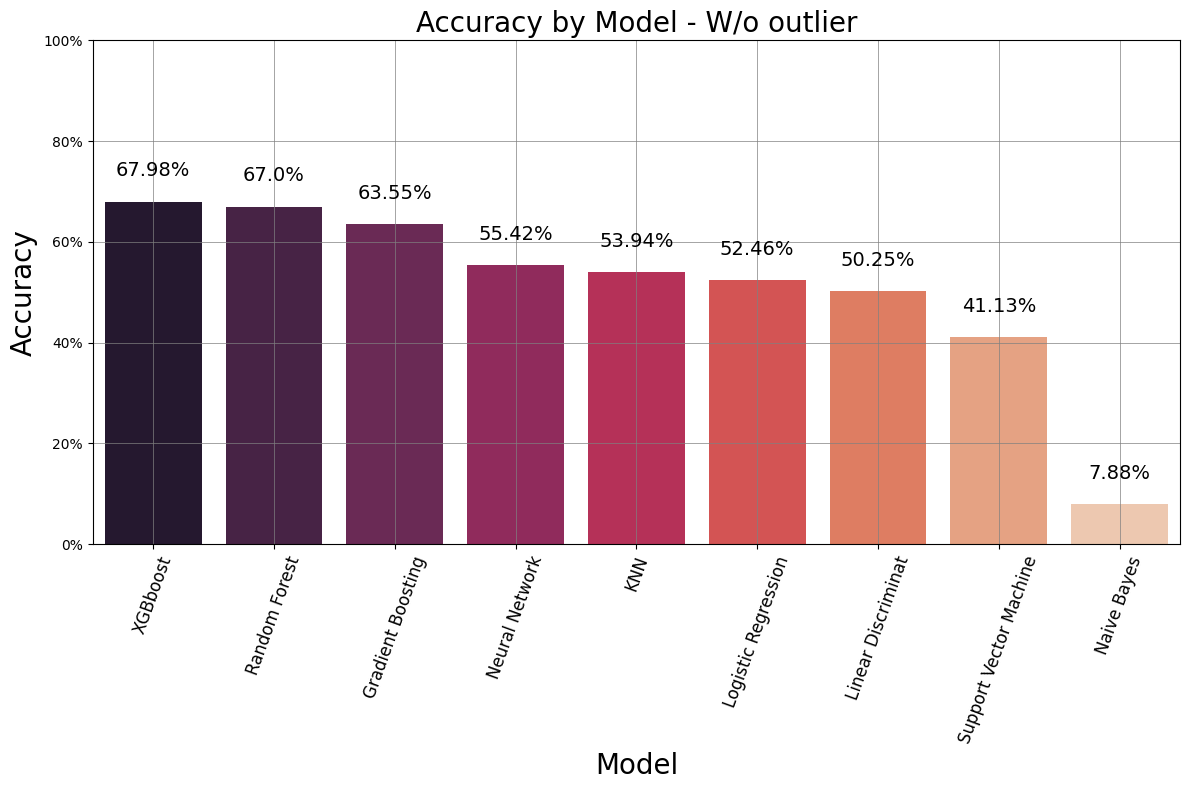

In [744]:
order = list(df_accuracy.sort_values('Accuracy', ascending=False).Model)
df_accuracy = df_accuracy.sort_values('Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

plt.figure(figsize=(12,8))
# make barplot and sort bars
x = sns.barplot(x='Model', y="Accuracy", data=df_accuracy, order = order, palette="rocket")
plt.xlabel("Model", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy by Model - W/o outlier", fontsize=20)
plt.grid(linestyle='-', linewidth='0.5', color='grey')
plt.xticks(rotation=70, fontsize=12)
plt.ylim(0,1)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

for i in range(len(model_list)):
    plt.text(x = i, y = df_accuracy.loc[i, 'Accuracy'] + 0.05, s = str(round((df_accuracy.loc[i, 'Accuracy'])*100, 2))+'%', 
             fontsize = 14, color='black',horizontalalignment='center')

y_value=['{:,.2f}'.format(x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.tight_layout()


## XGBoost Hyperparameter Tunning

In [574]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [575]:
params = XGB_model.get_xgb_params()
params

{'objective': 'multi:softmax',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eval_metric': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'monotone_constraints': '()',
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'num_class': 6}

In [576]:
params['eval_metric'] = "merror"

In [577]:
num_boost_round = 1000

In [578]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=50,
    verbose_eval=30)

print("Best merror: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

[0]	Test-merror:0.42611
[30]	Test-merror:0.33744
[60]	Test-merror:0.32266
[90]	Test-merror:0.31773
[104]	Test-merror:0.31281
Best merror: 0.31 with 56 rounds


#### Using XGBoost’s CV

In order to tune the other hyperparameters, we will use the cv function from XGBoost. It allows us to run cross-validation on our training dataset and returns a mean merror score. We will use a `k = 5` for every parameter.


In [579]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'merror'},
    early_stopping_rounds=50,
    verbose_eval=30
)
cv_results.tail()

[0]	train-merror:0.21812+0.01362	test-merror:0.42391+0.01757
[30]	train-merror:0.00015+0.00031	test-merror:0.34566+0.01143
[60]	train-merror:0.00000+0.00000	test-merror:0.32718+0.01707
[90]	train-merror:0.00000+0.00000	test-merror:0.32411+0.01990
[120]	train-merror:0.00000+0.00000	test-merror:0.32287+0.01581
[150]	train-merror:0.00000+0.00000	test-merror:0.32348+0.01677
[162]	train-merror:0.00000+0.00000	test-merror:0.32348+0.01519


,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
108,0.0,0.0,0.321637,0.017680
109,0.0,0.0,0.322868,0.018159
110,0.0,0.0,0.321022,0.017457
111,0.0,0.0,0.320403,0.018820
112,0.0,0.0,0.319787,0.018365


In [580]:
cv_results['test-merror-mean'].min()

0.3197872744539411

In [581]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(5,12)
    for min_child_weight in range(5,8)
]

In [582]:
# Define initial best params and MAE
min_merror = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'merror'},
        early_stopping_rounds=50,
        verbose_eval=False

    )
    # Update best merror
    mean_merror = cv_results['test-merror-mean'].min()
    boost_rounds = cv_results['test-merror-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_merror, boost_rounds))
    if mean_merror < min_merror:
        min_merror = mean_merror
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, merror: {}".format(best_params[0], best_params[1], min_merror))

CV with max_depth=5, min_child_weight=5
	MAE 0.33950427350427353 for 209 rounds
CV with max_depth=5, min_child_weight=6
	MAE 0.3394928774928775 for 100 rounds
CV with max_depth=5, min_child_weight=7
	MAE 0.3320892687559354 for 82 rounds
CV with max_depth=6, min_child_weight=5
	MAE 0.3327179487179487 for 69 rounds
CV with max_depth=6, min_child_weight=6
	MAE 0.33396581196581193 for 65 rounds
CV with max_depth=6, min_child_weight=7
	MAE 0.33458119658119656 for 140 rounds
CV with max_depth=7, min_child_weight=5
	MAE 0.329639126305793 for 66 rounds
CV with max_depth=7, min_child_weight=6
	MAE 0.33086419753086416 for 109 rounds
CV with max_depth=7, min_child_weight=7
	MAE 0.3345603038936372 for 68 rounds
CV with max_depth=8, min_child_weight=5
	MAE 0.3284178537511871 for 78 rounds
CV with max_depth=8, min_child_weight=6
	MAE 0.33518708452041784 for 96 rounds
CV with max_depth=8, min_child_weight=7
	MAE 0.3419696106362773 for 44 rounds
CV with max_depth=9, min_child_weight=5
	MAE 0.337648622

KeyboardInterrupt: 

In [618]:
params['max_depth'] = 8
params['min_child_weight'] = 5

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
# Define initial best params and MAE
min_merror = float("Inf")
best_params = None

for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'merror'},
        early_stopping_rounds=10,
        verbose_eval=False
    )
    
    # Update best MAE
    mean_merror = cv_results['test-merror-mean'].min()
    boost_rounds = cv_results['test-merror-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_merror, boost_rounds))
    if mean_merror < min_merror:
        min_merror = mean_merror
        best_params = (subsample,colsample)
        
print("Best params: {}, {}, merror: {}".format(best_params[0], best_params[1], min_merror))

CV with subsample=1.0, colsample=1.0
	MAE 0.33396201329534664 for 27 rounds
CV with subsample=1.0, colsample=0.9
	MAE 0.34565811965811966 for 21 rounds
CV with subsample=1.0, colsample=0.8
	MAE 0.32716239316239315 for 60 rounds
CV with subsample=1.0, colsample=0.7
	MAE 0.34072554605887934 for 60 rounds
CV with subsample=0.9, colsample=1.0
	MAE 0.34195251661918324 for 27 rounds
CV with subsample=0.9, colsample=0.9
	MAE 0.3462792022792023 for 13 rounds
CV with subsample=0.9, colsample=0.8
	MAE 0.32718138651471984 for 51 rounds
CV with subsample=0.9, colsample=0.7
	MAE 0.32284710351377016 for 49 rounds
CV with subsample=0.8, colsample=1.0
	MAE 0.3432060778727446 for 54 rounds
CV with subsample=0.8, colsample=0.9
	MAE 0.33273124406457744 for 36 rounds
CV with subsample=0.8, colsample=0.8
	MAE 0.3400892687559354 for 24 rounds
CV with subsample=0.8, colsample=0.7
	MAE 0.33334472934472936 for 33 rounds
CV with subsample=0.7, colsample=1.0
	MAE 0.35490978157644826 for 19 rounds
CV with subsamp

In [619]:
params['subsample'] = 0.9
params['colsample_bytree'] = 0.7

In [ ]:
%time
# This can take some time…
min_merror = float("Inf")
best_params = None

for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['merror'],
            early_stopping_rounds=10
)
    # Update best score
    mean_mae = cv_results['test-merror-mean'].min()
    boost_rounds = cv_results['test-merror-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_merror < min_merror:
        min_merror = mean_merror
        best_params = eta
print("Best params: {}, merror: {}".format(best_params, min_merror))

CPU times: user 7 µs, sys: 4 µs, total: 11 µs
Wall time: 44.1 µs
CV with eta=0.3
	MAE 0.32284710351377016 for 49 rounds

CV with eta=0.2
	MAE 0.32284710351377016 for 49 rounds

CV with eta=0.1
	MAE 0.32284710351377016 for 49 rounds

CV with eta=0.05
	MAE 0.32284710351377016 for 49 rounds

CV with eta=0.01
	MAE 0.32284710351377016 for 49 rounds

CV with eta=0.005
	MAE 0.32284710351377016 for 49 rounds

Best params: 0.3, merror: 0.33889458689458685


In [620]:
params['eta'] = 0.3

#### Results

In [621]:
params

{'objective': 'multi:softmax',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eval_metric': 'merror',
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 8,
 'max_leaves': 0,
 'min_child_weight': 5,
 'monotone_constraints': '()',
 'n_jobs': 0,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': None,
 'subsample': 0.9,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None,
 'num_class': 6,
 'eta': 0.3}

In [725]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=1000,
    verbose_eval=100
)

[0]	Test-merror:0.48522
[100]	Test-merror:0.31034
[114]	Test-merror:0.30049


In [726]:
num_boost_round = model.best_iteration + 1

best_model = xgb.train(
    params,
    dtrain,
    verbose_eval=100,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-merror:0.48522
[100]	Test-merror:0.31034
[114]	Test-merror:0.30049


In [727]:
metrics.accuracy_score(best_model.predict(dtest), y_test)

0.6995073891625616

## Confusion Matrix

In [728]:
cm = confusion_matrix(y_test, y_pred_XGB)

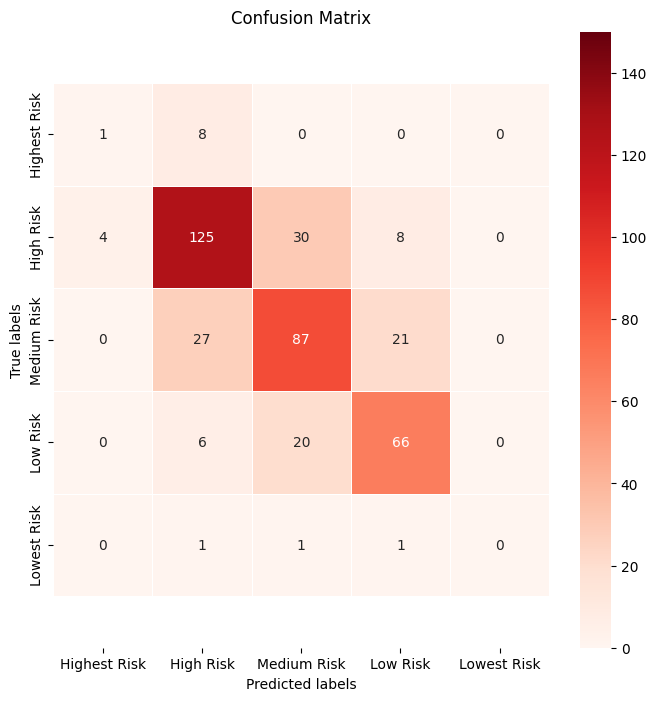

In [729]:
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(cm, annot = True, ax = ax, vmin=0, vmax=150, fmt="d", linewidths=.5, linecolor = 'white', cmap="Reds") # annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Highest Risk', 'High Risk', 'Medium Risk', 'Low Risk', 'Lowest Risk']);
ax.yaxis.set_ticklabels(['Highest Risk', 'High Risk', 'Medium Risk', 'Low Risk', 'Lowest Risk']);

# This part is to correct a bug from the heatmap funciton from pyplot
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.show()

In [730]:
print(classification_report(y_test, y_pred_XGB, target_names = ['Highest Risk', 'High Risk', 'Medium Risk', 'Low Risk', 'Lowest Risk']))

              precision    recall  f1-score   support

Highest Risk       0.20      0.11      0.14         9
   High Risk       0.75      0.75      0.75       167
 Medium Risk       0.63      0.64      0.64       135
    Low Risk       0.69      0.72      0.70        92
 Lowest Risk       0.00      0.00      0.00         3

    accuracy                           0.69       406
   macro avg       0.45      0.44      0.45       406
weighted avg       0.68      0.69      0.68       406



/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

Apparetly the fact that we have more labels in the edium Risk has enhanced its classification. However, overall we have achieved good classification scaores for most, with the exception of Highest Risk.


## Feature Selection
In our tast task we will identify which features were the most valuable for our model. In our first step we will check if by any chance we can increase the accuracy of our model extracting a feature.

In [ ]:
thresholds = sort(XGB_model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(XGB_model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.000, n=43, Accuracy: 68.72%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.012, n=42, Accuracy: 68.72%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.012, n=41, Accuracy: 68.72%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.013, n=40, Accuracy: 65.76%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.014, n=39, Accuracy: 66.50%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.014, n=38, Accuracy: 67.73%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.015, n=37, Accuracy: 66.01%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.015, n=36, Accuracy: 66.01%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.015, n=35, Accuracy: 66.50%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.015, n=34, Accuracy: 66.26%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.015, n=33, Accuracy: 65.52%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.015, n=32, Accuracy: 65.52%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.015, n=31, Accuracy: 63.79%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.015, n=30, Accuracy: 63.05%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.015, n=29, Accuracy: 64.78%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.016, n=28, Accuracy: 66.75%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.016, n=27, Accuracy: 67.73%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.016, n=26, Accuracy: 64.53%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.017, n=25, Accuracy: 64.78%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.017, n=24, Accuracy: 66.75%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.018, n=23, Accuracy: 65.52%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.018, n=22, Accuracy: 64.53%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.019, n=21, Accuracy: 64.04%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.019, n=20, Accuracy: 63.05%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.019, n=19, Accuracy: 63.30%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.019, n=18, Accuracy: 62.32%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.022, n=17, Accuracy: 61.33%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.022, n=16, Accuracy: 60.84%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.022, n=15, Accuracy: 56.65%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.022, n=14, Accuracy: 56.65%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.024, n=13, Accuracy: 56.65%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.025, n=12, Accuracy: 55.91%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.031, n=11, Accuracy: 54.19%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.031, n=10, Accuracy: 51.72%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.032, n=9, Accuracy: 51.97%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.035, n=8, Accuracy: 50.74%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.036, n=7, Accuracy: 51.72%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.037, n=6, Accuracy: 49.26%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.037, n=5, Accuracy: 48.77%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.046, n=4, Accuracy: 47.78%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.046, n=3, Accuracy: 43.60%
Thresh=0.060, n=2, Accuracy: 49.01%
Thresh=0.074, n=1, Accuracy: 44.58%


/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/Users/jung0202/opt/anaconda3/envs/tf2.0/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


It is not the case. Now lets visualize which are the most relevant features. 

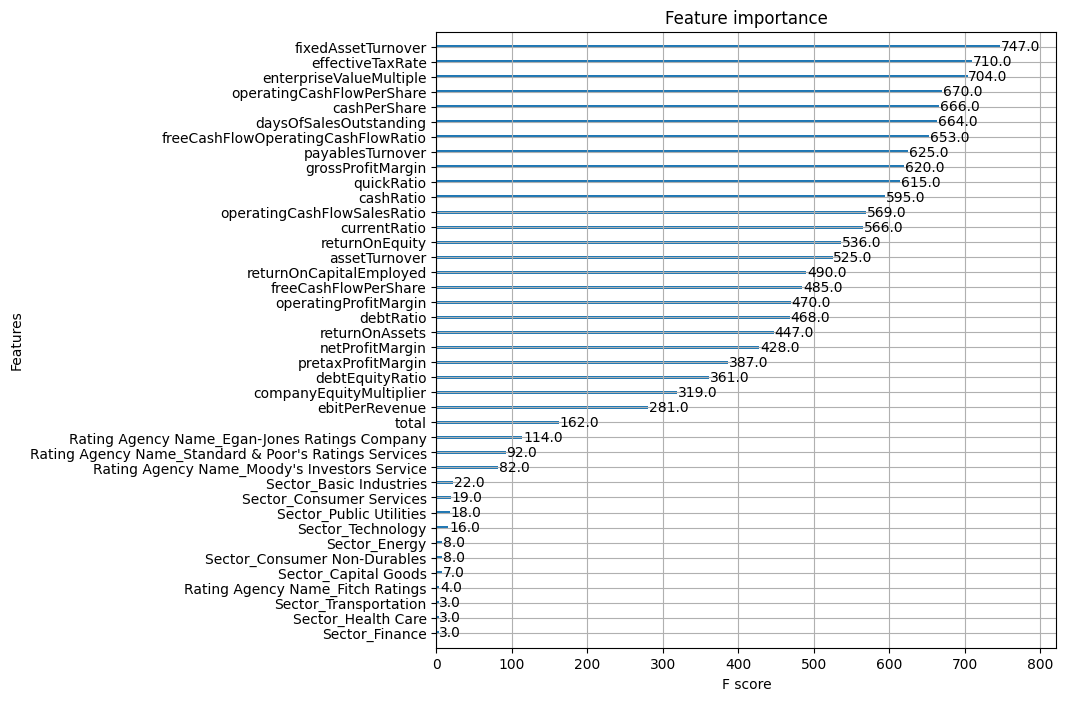

In [628]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(8, 8))
# xgboost.plot_importance(..., ax=ax)

plot_importance(model, ax=ax)
plt.show()

# Visualize Companies

**Bonus**: In this dataset we are working exclusevely with companies that are traded in the stock exchanges from the US. 
Now, we will visualize which companies are considered secure to lend money according to agencies. We will make 4 different wordclouds, one for each rating of risk. 
 
 #### Create a function to generate text for the word cloud
 

In [629]:
def WCloud(dataframe, column, rating):
    
    words = ''
    
    # iterate through the csv file 
    for val in dataframe.loc[dataframe['Rating'] == rating, column]:
      
        # typecaste each val to string 
        val = str(val)
        val = val.replace(".", "")
        val = val.replace(",", "")

        # split the value 
        tokens = val.split()

        #Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        words += " ".join(tokens) + " "
        
    return words

The names of companies usually have different suffixes that are not interesting for us, such as "LLC", "plc", "holding" etc. Therefore we will consider it as stopwords.

In [630]:
stop_words = ['global', 'incorporated', 'corporation', ' corp', 'industries', 'technologies', 'co', 'inc', 'limited', 'ltd', 'technology', 'resources', 'corp', 'group', 'communications',
             'holdings',' holding', 'plc', 'group', 'oil', 'resource', 'company','international', 'states', 'ag', ' sa', 'pty', 'international', 'united', 'states', 'partners', 'group', 
             'spa', 'se', 'lp', '(the)', 'the', 'LLC', 'n.v', 'service', 'products', 'companies', 'company', 'energy','corporation', 'holdings', 'company', 'limited',
             'holding', 'partners', 'industries', 'nv', 'semiconductor', 'rr', 'usa', 'homes', 'eletric', 'petroleum']

We generate the texts and create remove stopwords.

In [631]:
comment_wordsHR = WCloud(df_rating, 'Name', 0)
clean_text = [word for word in comment_wordsHR.split() if word not in stop_words]
comment_wordsHR = ' '.join([str(elem) for elem in clean_text])

comment_wordsHRest = WCloud(df_rating, 'Name', 1)
clean_text = [word for word in comment_wordsHRest.split() if word not in stop_words]
comment_wordsHRest = ' '.join([str(elem) for elem in clean_text])

comment_wordsLR = WCloud(df_rating, 'Name', 2)
clean_text = [word for word in comment_wordsLR.split() if word not in stop_words]
comment_wordsLR = ' '.join([str(elem) for elem in clean_text])

comment_wordsMR = WCloud(df_rating, 'Name', 3)
clean_text = [word for word in comment_wordsMR.split() if word not in stop_words]
comment_wordsMR = ' '.join([str(elem) for elem in clean_text])

KeyError: 'Name'

In this step we use the function `wordcloud` to create the plot.

In [ ]:
wordcloudMR = WordCloud(background_color ='white', colormap="twilight", max_font_size = 25,
                min_font_size = 10).generate(comment_wordsHR) 

wordcloudLR = WordCloud(background_color ='white', colormap="twilight", max_font_size = 25,
                min_font_size = 10).generate(comment_wordsLR) 

wordcloudHR = WordCloud(background_color ='white',  colormap="ocean",max_font_size = 25,
                min_font_size = 10).generate(comment_wordsHR) 

wordcloudHRest = WordCloud(background_color ='white', colormap="gnuplot2",max_font_size = 25,
                min_font_size = 10).generate(comment_wordsHRest) 


We finally plot all together....

Text(0.5, 1.0, 'Highest Risk Companies')

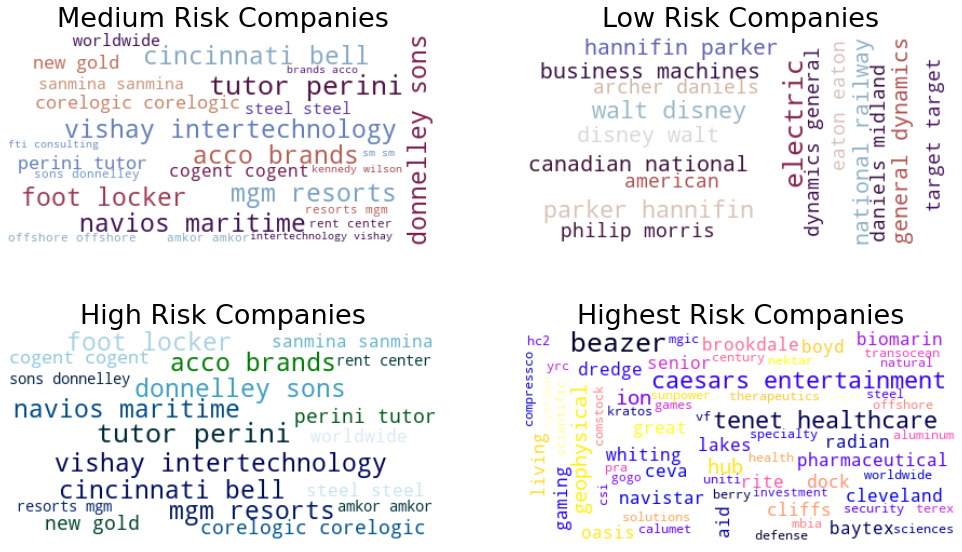

In [ ]:
fig = plt.figure(figsize = (17,10))
axes = fig.subplots(nrows=2, ncols=2)

plt.subplot(2, 2, 1)
plt.imshow(wordcloudMR, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0)
plt.title('Medium Risk Companies', fontsize = 27)

plt.subplot(2, 2, 2)
plt.imshow(wordcloudLR, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0)
plt.title('Low Risk Companies', fontsize = 27)

plt.subplot(2, 2, 3)
plt.imshow(wordcloudHR, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0)
plt.title('High Risk Companies', fontsize = 27)

plt.subplot(2, 2, 4)
plt.imshow(wordcloudHRest, interpolation="bilinear") 
plt.axis("off") 
plt.margins(x=0, y=0)
plt.title('Highest Risk Companies', fontsize = 27, fontweight = 2)

You may observe that some companies may be in different plots. Thats because they have been rated in different times with different rates.